# 情感分析模型对比实验
本 notebook 将使用多个 Hugging Face 上的情感分析模型对一组中英文样本文本进行推理对比，并输出：
- 分类结果
- 模型置信度
- 推理时间

并绘制：
- 平均置信度对比图
- 推理时间对比图

In [1]:

import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import warnings

# 忽略 transformers 的一些警告
warnings.filterwarnings("ignore")

# 设置中文字体（适配 matplotlib）
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False


In [2]:

MODELS = {
    "DistilBERT-SST2（英文）": "distilbert-base-uncased-finetuned-sst-2-english",
    "Multilingual-Sentiment（多语言）": "tabularisai/multilingual-sentiment-analysis",
    "Chinese-Roberta（中文）": "uer/roberta-base-finetuned-jd-binary-chinese"
}


In [3]:

# 定义测试样本和语言场景
SAMPLE_GROUPS = {
    "英文样本": [
        "I love this product!",
        "This is the worst day ever.",
        "The movie was okay, not great.",
        "I'm not sure how I feel about this.",
        "Absolutely fantastic experience!"
    ],
    "中文样本": [
        "今天的天气真不错。",
        "这款产品真的非常糟糕。",
        "服务态度一般般。",
        "我感觉有点不舒服。",
        "太棒了，五星好评！"
    ],
    "中英混合样本": [
        "今天的产品真的 very good!",
        "Service 很一般，不满意。",
        "这 movie 不错，但结局有点差。",
        "天气 cold 但是心情很好。",
        "客服态度 very bad，我不开心。"
    ]
}


In [4]:

def evaluate_model(model_display_name, model_name, samples, group_label):
    clf = pipeline("text-classification", model=model_name)
    results = []
    for text in samples:
        try:
            start = time.time()
            result = clf(text)[0]
            end = time.time()
            results.append({
                "模型": model_display_name,
                "样本类型": group_label,
                "文本": text,
                "分类结果": result["label"],
                "置信度": round(result["score"], 4),
                "推理时间(s)": round(end - start, 4)
            })
        except Exception as e:
            results.append({
                "模型": model_display_name,
                "样本类型": group_label,
                "文本": text,
                "分类结果": f"错误: {str(e)}",
                "置信度": 0.0,
                "推理时间(s)": 0.0
            })
    return results


In [5]:

all_results = []

for group_label, samples in SAMPLE_GROUPS.items():
    for model_name, model_path in MODELS.items():
        print(f"评估模型: {model_name}，样本类型: {group_label}")
        all_results.extend(evaluate_model(model_name, model_path, samples, group_label))

df = pd.DataFrame(all_results)
df.to_excel("多模型情感分析结果_中英分场景.xlsx", index=False)
df.head()


评估模型: DistilBERT-SST2（英文），样本类型: 英文样本
评估模型: Multilingual-Sentiment（多语言），样本类型: 英文样本
评估模型: Chinese-Roberta（中文），样本类型: 英文样本
评估模型: DistilBERT-SST2（英文），样本类型: 中文样本
评估模型: Multilingual-Sentiment（多语言），样本类型: 中文样本
评估模型: Chinese-Roberta（中文），样本类型: 中文样本
评估模型: DistilBERT-SST2（英文），样本类型: 中英混合样本
评估模型: Multilingual-Sentiment（多语言），样本类型: 中英混合样本
评估模型: Chinese-Roberta（中文），样本类型: 中英混合样本


,模型,样本类型,文本,分类结果,置信度,推理时间(s)
0,DistilBERT-SST2（英文）,英文样本,I love this product!,POSITIVE,0.9999,0.0472
1,DistilBERT-SST2（英文）,英文样本,This is the worst day ever.,NEGATIVE,0.9998,0.0468
2,DistilBERT-SST2（英文）,英文样本,"The movie was okay, not great.",NEGATIVE,0.9976,0.0472
3,DistilBERT-SST2（英文）,英文样本,I'm not sure how I feel about this.,NEGATIVE,0.9992,0.0313
4,DistilBERT-SST2（英文）,英文样本,Absolutely fantastic experience!,POSITIVE,0.9999,0.0383


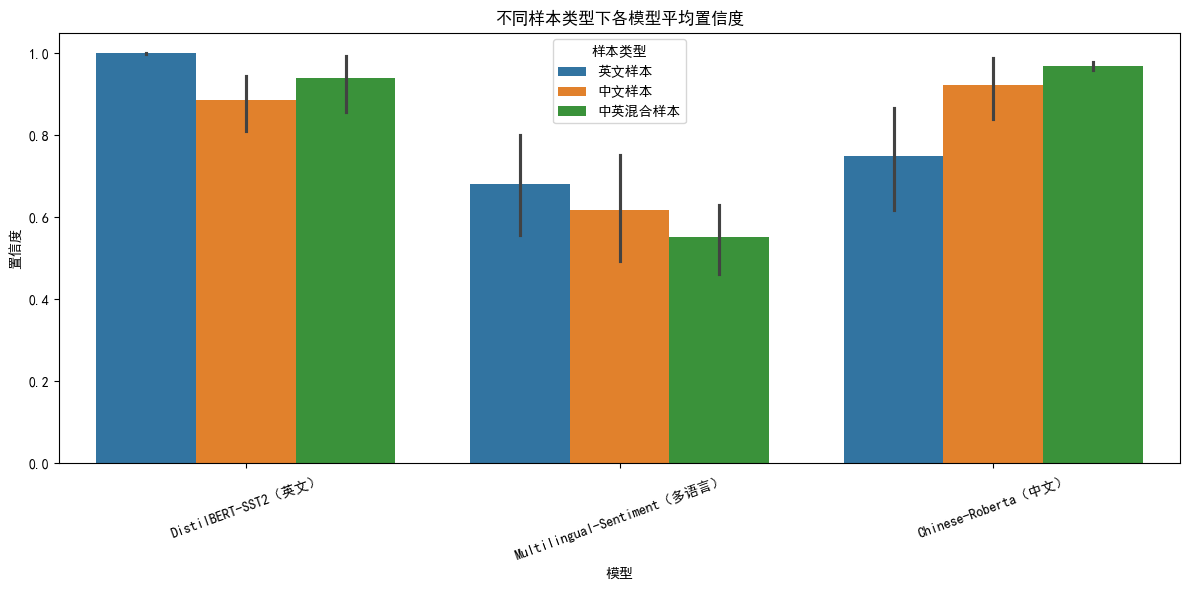

In [6]:

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="模型", y="置信度", hue="样本类型")
plt.title("不同样本类型下各模型平均置信度")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("平均置信度_按样本类型.png")
plt.show()


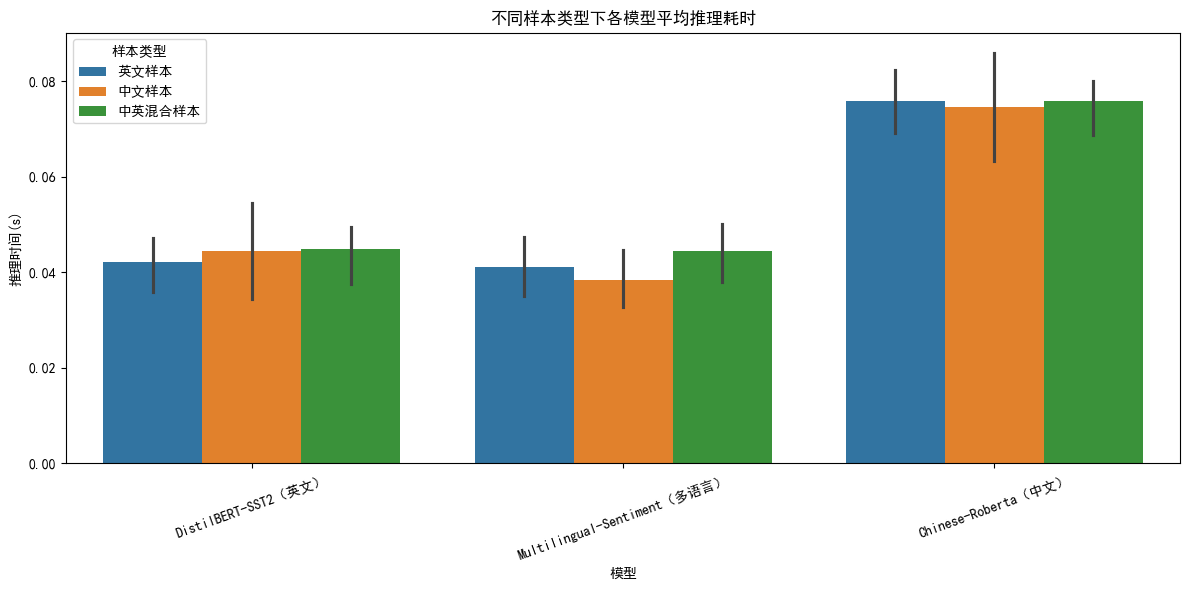

In [7]:

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="模型", y="推理时间(s)", hue="样本类型")
plt.title("不同样本类型下各模型平均推理耗时")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("平均推理耗时_按样本类型.png")
plt.show()


综上分析，DistilBERT-SST2（英文）在置信度和推理时间上综合表现更好！！